In [160]:
# Author: GreHiDeL
#ML Reference: https://www.askpython.com/python/examples/python-predict-function

In [161]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from datetime import date,timedelta

In [162]:
link="https://www.cryptodatadownload.com/cdd/Binance_BTCUSDT_d.csv"
btc = pd.read_csv(link, skiprows=1, usecols=['date', 'close','open'])

In [163]:
today=date.today()
today_date=today.strftime("%Y-%m-%d")
#diff_date=timedelta(date=10)#Timedelta for difference between two dates
btc=btc.loc[:today_date]

In [175]:
rows_count=len(btc.index)
#Conventional 70-30 rule for training and validation data set"""
train_rows=int(0.7*rows_count)
test_rows=int(0.3*rows_count)
data= btc.tail(rows_count) 
#data_test=btc.head(test_rows) # Validate the data model with 30% of the data

print(data)

print(data_test)

                    date      open     close
0    2022-04-27 00:00:00  38112.64  38172.34
1    2022-04-26 00:00:00  40426.08  38112.65
2    2022-04-25 00:00:00  39450.12  40426.08
3    2022-04-24 00:00:00  39441.61  39450.13
4    2022-04-23 00:00:00  39709.19  39441.60
..                   ...       ...       ...
198  2021-10-11 00:00:00  54659.01  57471.35
199  2021-10-10 00:00:00  54949.72  54659.00
200  2021-10-09 00:00:00  53955.67  54949.72
201  2021-10-08 00:00:00  53785.22  53951.43
202  2021-10-07 00:00:00  55315.00  53785.22

[203 rows x 3 columns]
                   date      open     close
0   2022-04-27 00:00:00  38112.64  38172.34
1   2022-04-26 00:00:00  40426.08  38112.65
2   2022-04-25 00:00:00  39450.12  40426.08
3   2022-04-24 00:00:00  39441.61  39450.13
4   2022-04-23 00:00:00  39709.19  39441.60
5   2022-04-22 00:00:00  40480.01  39709.18
6   2022-04-21 00:00:00  41358.19  40480.01
7   2022-04-20 00:00:00  41493.19  41358.19
8   2022-04-19 00:00:00  40801.13  41493

In [174]:
btc_open_data=data.open.values.reshape(-1,1)
btc_close_data=data.close.values.reshape(-1,1)
btc_close_test_data=data_test.close.values.reshape(-1,1)
print(btc_close_data)

[[38172.34]
 [38112.65]
 [40426.08]
 [39450.13]
 [39441.6 ]
 [39709.18]
 [40480.01]
 [41358.19]
 [41493.18]
 [40801.13]
 [39678.12]
 [40378.71]
 [40551.9 ]
 [39942.38]
 [41147.79]
 [40074.94]
 [39530.45]
 [42158.85]
 [42753.97]
 [42252.01]
 [43444.19]
 [43170.47]
 [45497.55]
 [46580.51]
 [46407.35]
 [45811.  ]
 [46283.49]
 [45510.34]
 [47067.99]
 [47434.8 ]
 [47122.21]
 [46827.76]
 [44511.27]
 [44313.16]
 [43991.46]
 [42882.76]
 [42364.13]
 [41002.25]
 [41262.11]
 [42201.13]
 [41757.51]
 [40917.9 ]
 [41114.  ]
 [39280.33]
 [39671.37]
 [37777.34]
 [38807.36]
 [38729.57]
 [39422.  ]
 [41941.71]
 [38730.63]
 [37988.  ]
 [38420.81]
 [39397.96]
 [39148.66]
 [42454.  ]
 [43892.98]
 [44421.2 ]
 [43160.  ]
 [37699.07]
 [39116.72]
 [39219.17]
 [38327.21]
 [37250.01]
 [38230.33]
 [37008.16]
 [38386.89]
 [40079.17]
 [39974.44]
 [40515.7 ]
 [43873.56]
 [44544.86]
 [42535.94]
 [42053.66]
 [42217.87]
 [42373.73]
 [43495.44]
 [44372.72]
 [44042.99]
 [43839.99]
 [42380.87]
 [41382.59]
 [41574.25]
 [37

In [166]:
#Decision Tree Regressor
data_model=DecisionTreeRegressor(max_depth=100).fit(btc_open_data,btc_close_data)
DTR_data_predict=data_model.predict(btc_close_test_data)
print(DTR_data_predict)

[37881.76 38172.34 38112.65 40426.08 39450.13 39441.6  39709.18 40480.01
 41358.19 41493.18 40801.13 39678.12 40378.71 40551.9  39942.38 41147.79
 40074.94 39530.45 42158.85 42753.97 42252.01 43444.19 43170.47 45497.55
 46580.51 46407.35 45811.   46283.49 45510.34 47067.99 47434.8  47122.21
 46827.76 44511.27 44313.16 43991.46 42882.76 42364.13 41002.25 41262.11
 42201.13 41757.51 40917.9  41114.   39280.33 39671.37 37777.34 38807.36
 38729.57 39422.   41941.71 38730.63 37988.   38420.81 39397.96 39148.66
 42454.   43892.98 44421.2  43160.  ]


# Technique 2 K-Nearest Neighbour Regression

In [167]:
#KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler # Scaling for the training data
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from matplotlib import pyplot as plt
import numpy as np

 X= Training Data, Y= Target values

Text(0, 0.5, 'Error')

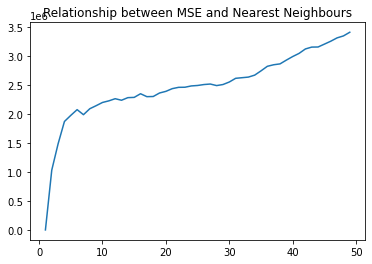

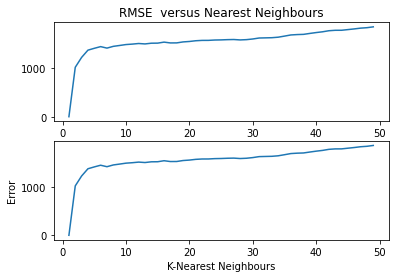

In [168]:
# Choosing the K-Nearest Neighbour based on loop
mse_error=[]
rmse_error=[]
x_range=range(1,50)# K-Nearest neighbour (range of 1-50)
for k in x_range:
    KNN_model = KNeighborsRegressor(n_neighbors=k).fit(btc_open_data,btc_close_data)
    closeData_predict=KNN_model.predict(btc_open_data)
    mse_error.append(mean_squared_error(btc_close_data,closeData_predict))
    rmse_error.append(sqrt(mean_squared_error(btc_close_data,closeData_predict)))
plt.title("Relationship between MSE and Nearest Neighbours")
plt.plot(x_range,mse_error, label='MSE')
figure, axis =plt.subplots(2)  # Minimum is two but we need one. 
axis[0].plot(x_range,rmse_error)
axis[0].set_title("RMSE  versus Nearest Neighbours")
axis[1].plot(x_range,rmse_error)
axis[0].set_title("RMSE  versus Nearest Neighbours") # The other is redundant
plt.xlabel("K-Nearest Neighbours")
plt.ylabel("Error")

The graph above helps in determining the nearest neighbours below. 
#So by observing the appropriate K-Nearest Neighbour the target price predictions can proceed normally

In [169]:
KNN_model = KNeighborsRegressor(n_neighbors=4).fit(btc_open_data,btc_close_data) # Fit(X,Y)
closeData_KNN_predict = KNN_model.predict(btc_open_data)  # Y_predict=Predict (X)
print(closeData_KNN_predict)

[[38008.685 ]
 [39368.5975]
 [39256.6475]
 [39256.6475]
 [39899.5   ]
 [39543.745 ]
 [41305.33  ]
 [41700.3475]
 [40515.0325]
 [39899.5   ]
 [39368.5975]
 [39543.745 ]
 [40041.4375]
 [41056.665 ]
 [40041.4375]
 [39670.18  ]
 [41299.585 ]
 [43278.2325]
 [42105.465 ]
 [42788.06  ]
 [43125.8825]
 [44828.11  ]
 [46968.965 ]
 [46336.0975]
 [44828.11  ]
 [46737.16  ]
 [44828.11  ]
 [47138.015 ]
 [46779.8225]
 [47138.015 ]
 [47759.15  ]
 [44522.435 ]
 [44681.8625]
 [43424.9975]
 [43284.315 ]
 [42650.1575]
 [41245.48  ]
 [40951.3775]
 [41299.585 ]
 [41868.9875]
 [41633.18  ]
 [41056.665 ]
 [39512.3725]
 [39899.5   ]
 [39866.2775]
 [38855.6925]
 [38855.6925]
 [39256.6475]
 [41627.43  ]
 [38855.6925]
 [38312.9075]
 [38227.48  ]
 [39256.6475]
 [39331.9375]
 [42437.845 ]
 [42393.2   ]
 [44681.8625]
 [43125.8825]
 [39866.2775]
 [39331.9375]
 [39331.9375]
 [37866.335 ]
 [38962.0875]
 [38130.82  ]
 [37516.96  ]
 [38227.48  ]
 [40041.4375]
 [40041.4375]
 [39543.745 ]
 [42393.2   ]
 [44522.435 ]
 [4264

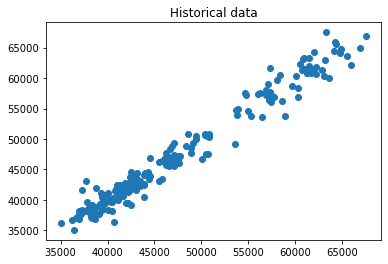

In [170]:
plt.title("Historical data")
plt.scatter(btc_open_data,btc_close_data, label='Historical data')

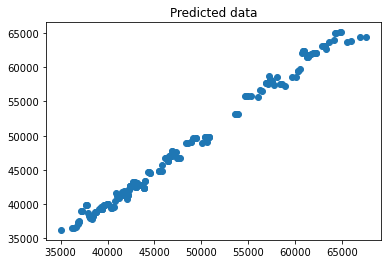

In [171]:
plt.title("Predicted data")
plt.scatter(btc_open_data,closeData_KNN_predict, label='Historical data')

In [172]:
MSE=mean_squared_error(btc_close_data,closeData_KNN_predict)
print("Mean Squared Error:" +str(MSE))
RMSE=sqrt(mean_squared_error(btc_close_data,closeData_KNN_predict))
print("RMSE:" +str(RMSE))
R2_Score=r2_score(btc_close_data,closeData_KNN_predict)
print("R2_Score:" +str(R2_Score))

Mean Squared Error:1873717.7947623155
RMSE:1368.838118537877
R2_Score:0.9751784609675753


In [176]:
# Target Price
Target_Price_data=btc_close_data[0]
Target_Price_predicted=closeData_KNN_predict[0]
print("The original Target_Price was :"+str(Target_Price_data))
print("The predicted Target_Price :"+str(Target_Price_predicted))

The original Target_Price was :[38172.34]
The predicted Target_Price :[38008.685]
